<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/ChicagoTaxiRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

pd.options.display.max_rows = 50

url = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/chicago_taxi_sample_50k.csv'
df = pd.read_csv(url)

df_taxi = df.copy()
df_taxi

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,ride_date
0,d3c594ba6b3eb5f9644b9af3f1328aa82744ffd5,a0ac953f8cee6f14d8f2f15bf14b52de5caab289f7d599...,2019-09-13 23:00:00+00:00,2019-09-13 23:00:00+00:00,60.0,0.0,NaN,NaN,7.0,7.0,3.25,0.00,0.0,0.0,3.25,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),2019-09-13
1,cac1926e5b4ca977decbf9079ffd4b02cae90503,b5e2695a2f44b9bce7a0a86148ac418802f0067be1f6d4...,2014-06-19 18:00:00+00:00,2014-06-19 18:15:00+00:00,840.0,2.3,NaN,NaN,24.0,8.0,9.85,2.00,0.0,0.0,11.85,Credit Card,NaN,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),2014-06-19
2,ab1adf76a077d31a82824264aed032f197423f5d,41afbb1073e9c58a6dbdfff8ad24160d01c862ca34c520...,2018-08-24 16:00:00+00:00,2018-08-24 16:45:00+00:00,3180.0,0.9,1.703198e+10,1.703108e+10,76.0,8.0,41.00,9.20,0.0,5.0,55.20,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),2018-08-24
3,d19b9b5131a749b6c8fee6661a84833421c1e25f,6daab772b2fe0e6dcb68884525d6ad9d44ce74ecaeb417...,2015-06-20 12:15:00+00:00,2015-06-20 12:30:00+00:00,540.0,2.9,1.703108e+10,1.703107e+10,8.0,7.0,9.44,2.00,0.0,0.0,11.44,Credit Card,NaN,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.929263,-87.635891,POINT (-87.6358909539 41.9292629902),2015-06-20
4,48262d526cc41442f947b81a3ab0f60174fc66cc,11f73b08790612efe341cf8cf69cadbcb7732293794186...,2018-08-10 21:00:00+00:00,2018-08-10 21:00:00+00:00,600.0,1.6,1.703128e+10,1.703108e+10,28.0,8.0,7.50,1.50,0.0,0.0,9.00,Credit Card,Choice Taxi Association,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2018-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,a3a6c9af9051d48af2b7b2fbdf02c962fa9a9ca9,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2014-06-20 13:00:00+00:00,2014-06-20 13:00:00+00:00,515.0,1.6,1.703108e+10,1.703128e+10,8.0,28.0,7.25,2.00,NaN,1.0,10.25,Credit Card,American United,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.879255,-87.642649,POINT (-87.642648998 41.8792550844),2014-06-20
49996,33b1fb15a4e0b417f8dcee508993db379abd0039,45bd8de07cb28a2d16874f8ba527f094fe8b68dceb5f59...,2014-06-30 14:30:00+00:00,2014-06-30 14:45:00+00:00,1140.0,1.0,NaN,NaN,69.0,69.0,10.45,0.00,0.0,1.0,11.45,Cash,Choice Taxi Association,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),2014-06-30
49997,cf5dbfda73e899b9889024b9ee51a97a4df72489,5c4dbf120a97d6d82d93388ef3ec44ea96fff151a5f179...,2014-09-20 01:45:00+00:00,2014-09-20 01:45:00+00:00,240.0,1.1,1.703183e+10,1.703107e+10,7.0,7.0,5.65,2.00,0.0,1.0,8.65,Credit Card,Choice Taxi Association,41.914747,-87.654007,POINT (-87.6540070286 41.9147473049),41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),2014-09-20
49998,dbac35b3e6a4ac99f8c691aaf885abc2f43cb4ca,6682944f2b37609761181033253037c05fed4377e8b649...,2019-07-23 16:00:00+00:00,2019-07-23 16:30:00+00:00,1500.0,0.0,NaN,NaN,32.0,15.0,25.75,0.00,0.0,5.0,30.75,Cash,Star North Management LLC,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.954028,-87.763399,POINT (-87.7633990316 41.9540276487),2019-07-23


In [ ]:
df_taxi['company'].fillna('Missing Company', inplace=True)

44715


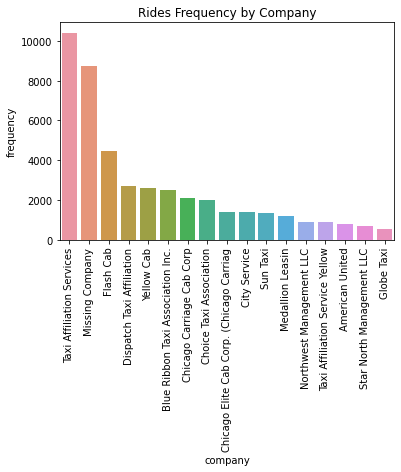

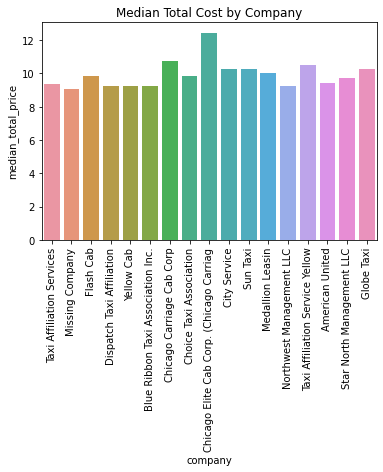

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


hist_data_1 = pd.DataFrame(df_taxi.groupby(['company']).count()['unique_key']).rename(columns={'unique_key': 'frequency'})
hist_data_1['median_total_price'] = df_taxi.groupby(['company']).median()['trip_total']
hist_data_1['std_total_price'] = df_taxi.groupby(['company']).std()['trip_total']
hist_data_1.reset_index(inplace=True)
hist_data_1 = hist_data_1.sort_values(by=['frequency'], ascending=False)


filtered_hist_data_1 = hist_data_1[hist_data_1['frequency'] > 500]
print(hist_data_1[hist_data_1['frequency'] > 500]['frequency'].sum())

sns.barplot(x='company', y='frequency', data = filtered_hist_data_1)
plt.xticks(rotation=90)
plt.title('Rides Frequency by Company')
plt.show()

sns.barplot(x='company', y='median_total_price', data = filtered_hist_data_1)
plt.xticks(rotation=90)
plt.title('Median Total Cost by Company')
plt.show()

In [ ]:
hist_data_1[(hist_data_1['std_total_price'] > 0.1) & (hist_data_1['frequency'] > 500)].head(50)

,company,frequency,median_total_price,std_total_price
105,Taxi Affiliation Services,10411,9.35,13.953133
89,Missing Company,8719,9.05,16.625984
81,Flash Cab,4475,9.85,14.863756
79,Dispatch Taxi Affiliation,2714,9.25,12.472354
111,Yellow Cab,2624,9.25,13.848257
65,Blue Ribbon Taxi Association Inc.,2520,9.25,82.797080
69,Chicago Carriage Cab Corp,2091,10.75,18.093864
77,Choice Taxi Association,2001,9.85,15.979333
71,Chicago Elite Cab Corp. (Chicago Carriag,1385,12.45,18.636226
78,City Service,1380,10.25,17.155929


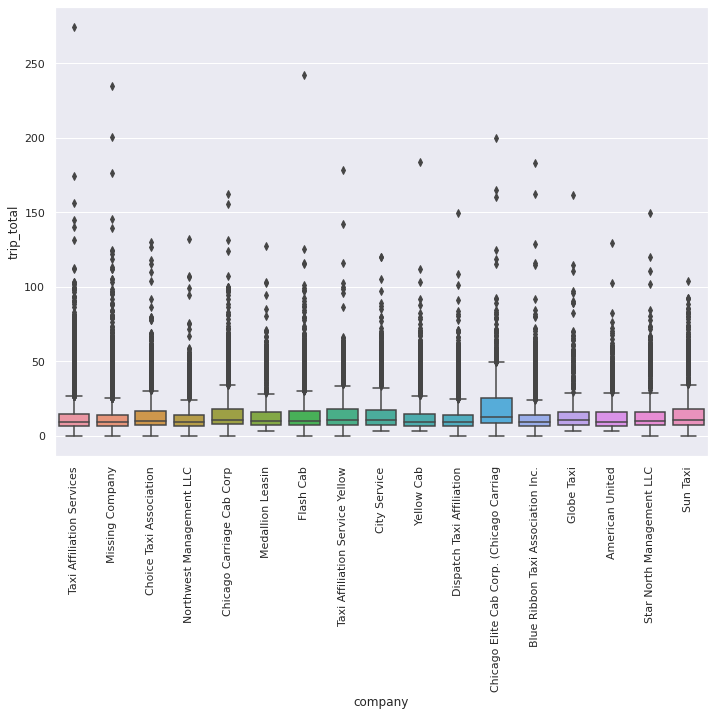

In [ ]:
companies = list(hist_data_1[(hist_data_1['std_total_price'] > 0.1) &
                             (hist_data_1['frequency'] > 500)].head(50)['company'].values)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='company', y='trip_total', data = df_taxi[(df_taxi['trip_total'] < 300) & (df_taxi['company'].isin(companies))])
plt.xticks(rotation=90)
plt.show()

